In [9]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names, pairwise_significance_exp_ids

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


wins [27, 31, 32, 29, 28, 33, 30]
Calculating CI for exp 27
Calculating CI for exp 31
Calculating CI for exp 32
Calculating CI for exp 29
Calculating CI for exp 28
Calculating CI for exp 33
Calculating CI for exp 30


/home/m/mm/mmb28/anaconda3/lib/python3.4/site-packages/seaborn/categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)

  UserWarning)



Composer has 3500 values
Accuracy has 3500 values
folds has 3500 values
algo has 3500 values
Corpus has 3500 values
0.2184633027522936


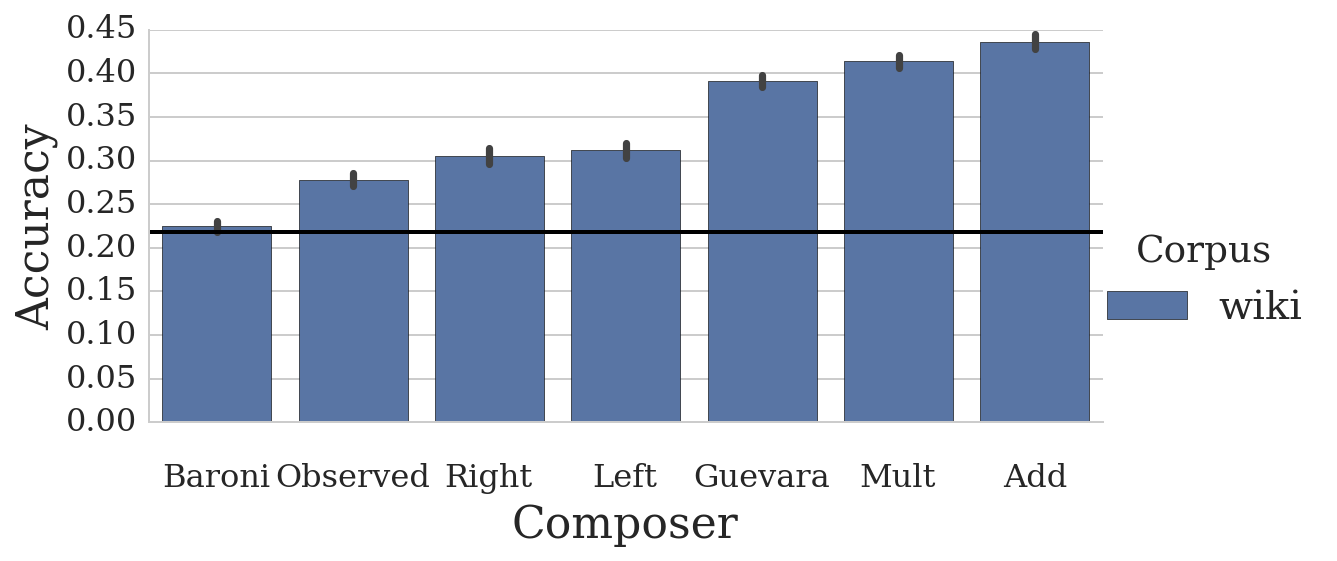

In [2]:
d1 = {
    'document_features_ev': 'AN+NN',
    'document_features_tr': 'J+N+AN+NN',
    'labelled': 'amazon_grouped-tagged',
    'expansions__allow_overlap': 0,
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
    'expansions__vectors__algorithm': 'count_windows',
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
    'expansions__vectors__unlabelled__in': ['wiki'],
    'expansions__vectors__unlabelled_percentage': 100
     }

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).\
            order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

wins = _get(d1)
print('wins', wins)
fields_to_include = {'algo':'expansions__vectors__algorithm', 
                     'Composer':'expansions__vectors__composer',
                    'Corpus':'expansions__vectors__unlabelled'}
df = dataframe_from_exp_ids(wins, fields_to_include)

g = sns.factorplot(x='Composer', y='Accuracy', data=df, kind='bar', hue='Corpus',
                  x_order=sort_df_by(df, 'Composer'), aspect=2);
# g.set_xticklabels(rotation=60);
plt.axhline(random_vect_baseline(), color='black');
print(random_vect_baseline())
g.savefig('plot-windows-funky-composers.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [3]:
for eid in wins + [1]:
    exp = Experiment.objects.get(id=eid)
    mean, low, high, _ = get_ci(eid)
    print('%s & %.2f$\pm$%.2f \\\\'%(exp.expansions.vectors.composer, mean, (high-low)/2))

Add & 0.44$\pm$0.01 \\
Baroni & 0.22$\pm$0.01 \\
Guevara & 0.39$\pm$0.01 \\
Left & 0.31$\pm$0.01 \\
Mult & 0.41$\pm$0.01 \\
Observed & 0.28$\pm$0.01 \\
Right & 0.31$\pm$0.01 \\
Calculating CI for exp 1
random_neigh & 0.22$\pm$0.01 \\


In [4]:
random_vect_baseline()

0.2184633027522936

In [5]:
def f1(x):
    return '%1.2f' % x

ddf = df.drop('folds', axis=1).groupby('Composer').agg([np.mean, np.std])
ddf.columns = ddf.columns.droplevel(0)
ddf = ddf.sort('mean')
# print(ddf.to_latex())
ddf.columns, ddf.index

(Index(['mean', 'std'], dtype='object'),
 Index(['Baroni', 'Observed', 'Right', 'Left', 'Guevara', 'Mult', 'Add'], dtype='object', name='Composer'))

In [6]:
ddf['Accuracy'] = ddf['mean'].map(f1) + "$\pm$" + ddf['std'].map(f1)
ddf = ddf.drop(['mean', 'std'], axis=1)#.reset_index()#.sort()
print(ddf.to_latex(float_format=f1, escape=False))

# ddf = df.drop('folds', axis=1).groupby('Composer').agg('mean').reset_index() # no need to drop unwanted columns
# print(ddf.to_latex(float_format=f1))

ddf

\begin{tabular}{ll}
\toprule
{} &       Accuracy \\
\midrule
Composer &                \\
Baroni   &  0.22$\pm$0.00 \\
Observed &  0.28$\pm$0.00 \\
Right    &  0.31$\pm$0.00 \\
Left     &  0.31$\pm$0.00 \\
Guevara  &  0.39$\pm$0.00 \\
Mult     &  0.41$\pm$0.00 \\
Add      &  0.44$\pm$0.00 \\
\bottomrule
\end{tabular}



,Accuracy
Composer,
Baroni,0.22$\pm$0.00
Observed,0.28$\pm$0.00
Right,0.31$\pm$0.00
Left,0.31$\pm$0.00
Guevara,0.39$\pm$0.00
Mult,0.41$\pm$0.00
Add,0.44$\pm$0.00


In [11]:
for i in wins:
    print(i, Experiment.objects.get(id=i).expansions.vectors.composer)

27 Add
31 Baroni
32 Guevara
29 Left
28 Mult
33 Observed
30 Right


# Significance 

In [15]:
from discoutils.collections_utils import walk_overlapping_pairs
pairwise_significance_exp_ids(walk_overlapping_pairs([27, 28, 32, 29, 30, 33, 31, 1]), 
                              ['expansions__vectors__composer'])

Running significance for (27, 28)
Running significance for (28, 32)
Running significance for (32, 29)
Running significance for (29, 30)
Running significance for (30, 33)
Running significance for (33, 31)
Running significance for (31, 1)


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,Add,0.435622,Mult,0.414005,0.021617,0.000,True
1,Mult,0.414005,Guevara,0.391088,0.022917,0.000,True
2,Guevara,0.391088,Left,0.311557,0.079530,0.000,True
3,Left,0.311557,Right,0.305452,0.006105,0.394,False
4,Right,0.305452,Observed,0.278138,0.027314,0.000,True
5,Observed,0.278138,Baroni,0.224946,0.053192,0.000,True
6,Baroni,0.224946,RandN,0.217762,0.007184,0.132,False
